In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employee=pd.read_csv('employee.csv')
df=pd.read_csv('employee.csv')
employee

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# basic details of dataset

In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [4]:
employee.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# Reset the index as name

In [5]:
employee.set_index('name',inplace=True)
employee


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Select rows for specific names Jack Morgan and Josh wills.

In [6]:
df.loc[(df['name'] == 'Jack Morgan') | (df['name']=='Josh Wills')]


,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# Select data for multiple values "Sales" and “Finance”.

In [7]:
df.loc[(df['department'] == 'Sales') | (df['department']=='Finance')]


,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 700 performance score

In [8]:
df.loc[(df['performance_score'] > 700)]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 500 and less than 700 performance score

In [9]:
df.loc[(df['performance_score'] > 500) & (df['performance_score'] < 700) ]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# Check and handle missing values in the dataset.

In [10]:
df.isna()

,name,age,income,gender,department,grade,performance_score
0,False,False,True,True,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,True,False,True,False,False,False
6,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False


In [11]:
#number of null values in each column
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

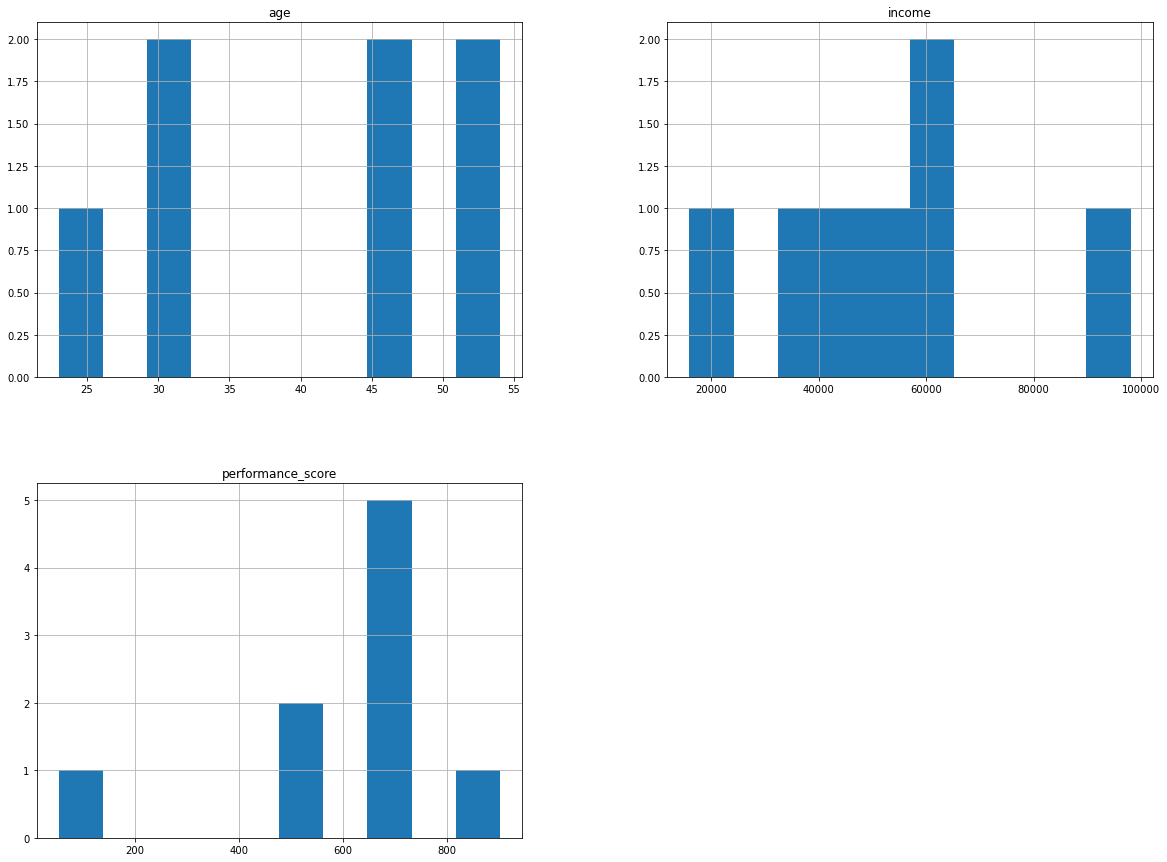

In [12]:
#handling missing values
df.hist(figsize=(20,15))
plt.show()

In [13]:
for i in ['age','income']:
    df[i]=df[i].fillna(df[i].median())
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [14]:
df.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Boxplot of performance score')

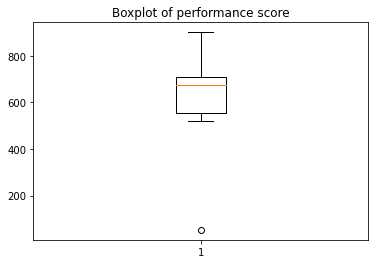

In [15]:
plt.boxplot(df['performance_score'])
plt.title('Boxplot of performance score')

There is one outlier in the performance score

In [16]:
#Handling outliers using percentile

#Finding Quartile values
q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

556.0
674.0
711.0


In [17]:
#finding interquartile range
iqr=q3-q1
lower_lim=q1-(1.5*iqr)
up_lim=q3+(1.5*iqr)
print('IQR:', iqr)
print('Lower limit:',lower_lim)
print('Upper limit:',up_lim)

IQR: 155.0
Lower limit: 323.5
Upper limit: 943.5


In [18]:
#checking outliers
outlier=[]
for i in df['performance_score']:
    if (i > up_lim) or (i < lower_lim):
        outlier.append(i)
print('Outlier:',outlier)
#index of outlier
ind=df['performance_score']  < lower_lim
df.loc[ind].index


Outlier: [53]


Int64Index([6], dtype='int64')

In [19]:
#droping the outlier
df.drop([6],inplace=True)


In [20]:
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# Check the gender column and do Dummy encoding.

In [24]:
#checking unique values in gender column
employee['gender'].nunique()

2

In [25]:
gender_dummies=pd.get_dummies(employee['gender'])
gender_dummies

,F,M
name,,
Allen Smith,0,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,0,0
James Authur,1,0
Josh Wills,1,0
Leo Duck,0,1


# Do the standard scaling on the feature performance score.

In [26]:
employee['performance_score']


name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
James Authur      53
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

In [27]:
employee['performance_score'].describe()

count      9.000000
mean     610.666667
std      235.671912
min       53.000000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [30]:
from sklearn import preprocessing

In [31]:
employee_new =np.array(employee['performance_score']).reshape(-1, 1) 
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(employee_new)
X = pd.DataFrame(X)
X.describe()

,0
count,9.000000e+00
mean,2.035409e-16
std,1.060660e+00
min,-2.509823e+00
25%,-2.460317e-01
50%,2.850367e-01
75%,4.515581e-01
max,1.306668e+00
